<a href="https://colab.research.google.com/github/MekhzZ/LearningPath/blob/main/AppliedStatisticsWithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy

here I installed the required libraries with some shortform to use it easily


In [2]:
df = pd.read_csv('train.csv')

Here I created dataframe as df variable to read the csv file named as train.csv

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


df.head shows the top 5 datas in a dataset which is essential to know the nature of dataset

In [4]:
df.shape

(614, 13)

df.shape represents the total number of rows and columns in a dataframe or dataset.

Since we were learning about the CLT or Central Limit Theorem where we learned about the normally distributed dataset. So, Let's check it by Calculating mean and median

In [5]:
popn = df.ApplicantIncome #we allocated popn as ApplicationIcome column of dataframe df

In [6]:
popn.mean()

5403.459283387622

In [7]:
popn.median()

3812.5

Here after we calculated mean and median , we can say that the median and mean are not close enough which conclude that dataframe is not normally distributed. Let's check it by plotting a map

Setting the kde argument of the histplot function to True will add a curve representing the kernel density estimate of the data, calculated with the default parameters of the kdeplot function.

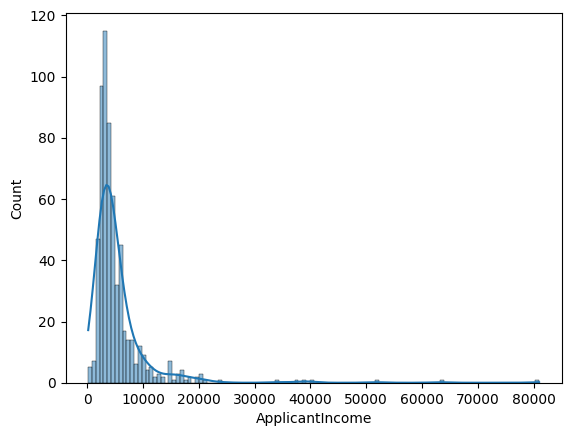

In [8]:
sns.histplot(popn, kde=True)
plt.show()

After seeing the above figure it's sure taht the dataframe we took is not normally distributed

DAY 3





SO Let's go further more to select a appropriate data sample in dataset

 **Central Limit Theorem**

 three things we need to rember are:


1.   mean and median of sample data are nearly equal,
2.   mean of sample data and population(maindata) are nearly equal, and
3.   standard error sampling distribution is nearly equal to standard deviation of sample data





**Problem Setup**

lets sample 25 people on their income , create a list of sample mean with n=25 take their mean compare it with a population mean

**Create a list of sample mean list with n=25,50,100,150,200 **

Lets create a list sample_mean here lets take 300 samples each of n random values with replacement. For each sample, lets calculate the mean of the sample and store all those sample mean values in the list sample_means respectively.

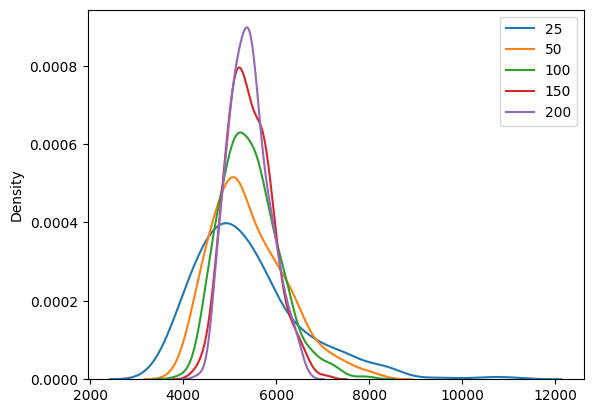

In [9]:
sample_means_list = [] #created null list
n_best = 0
n_lists = [25,50,100,150,200]
skew = []
kurt = []
for n in n_lists :
  sample_means_trial = []
  for sample in range(0,300): #ranges upto 300 to take a random data with replacement
    sample_values = np.random.choice(popn, size=n)
    sample_mean = np.mean(sample_values) # calculated the mean
    sample_means_trial.append(sample_mean) # and added the mean to the sample mean trail


  sns.kdeplot(sample_means_trial, label=n)
  sample_means_list.append(sample_means_trial)
  skewness=scipy.stats.skew(sample_means_trial)
  skew.append(skewness)
  kurtosis= scipy.stats.kurtosis(sample_means_trial)
  kurt.append(kurtosis)
plt.legend();



in above, we used sns for 3D plotting whereas plt for 2D plotting.
skew = the value to represent the degree of normally distribution the less value the perfect
kurt = the highest peak of the curve

from figure we can see that the curves of sample mean trials of taking samples
150 curve is more like noramlly distributed

In [10]:
print('skew:',skew)

skew: [1.3356397419273571, 0.756166551281051, 0.7118841905875155, 0.4200881357638068, 0.3977731774876127]


In [11]:
print('kurt:',kurt)

kurt: [2.6866590916821753, 0.31025055293697834, 0.7590879404784228, 0.03169695367383474, -0.28511522075783313]


After comapring skew and kurt, the lowest value is the 4th one i.e. 150
which ensures it is normally distributed


<ipython-input-12-4fd8d7756104>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means)


<Axes: ylabel='Density'>

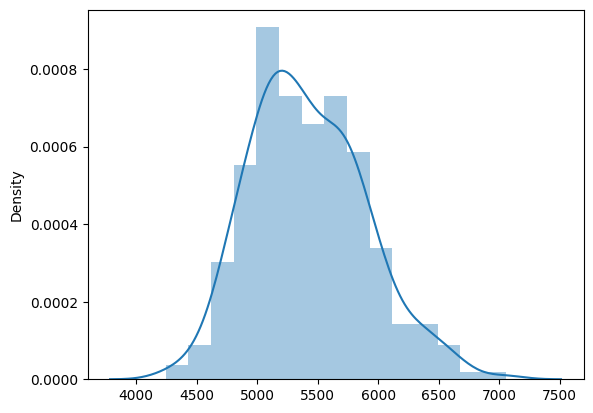

In [12]:
means_list_index= (np.abs(skew)+np.abs(kurt)).argmin()
sample_means= sample_means_list[means_list_index]
sns.distplot(sample_means)

Hence we can see the proof of CLT here, i.e. we have taken samples from the Population (Income) and their sample mean form approximately a normal distribution (with proper sample size).

The curve is fairly symmetrical around the central value and the median is roughly equivalent to the mean lets check it.




Now let's check mean ,median of sample also of popn

In [13]:
median_of_sample_means = np.median(sample_means)
mean_of_sample_mean = np.mean(sample_means)
print(median_of_sample_means)
print(mean_of_sample_mean)

5372.286666666667
5420.2186


mean and median are nearly equal here

Now lets check the mean of popn too and compare it with sample man

In [14]:
print(np.mean(popn))
print(mean_of_sample_mean)

5403.459283387622
5420.2186


Which is nearly equal measn perfect sample to take

.


**Day 4**


let's learn more about skewness

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


now lets take a 'num' variable to select column data

In [17]:
num = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

Now lets plot the diagram to know which one is normally distributed


<ipython-input-18-0dfb96cc5a86>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n])


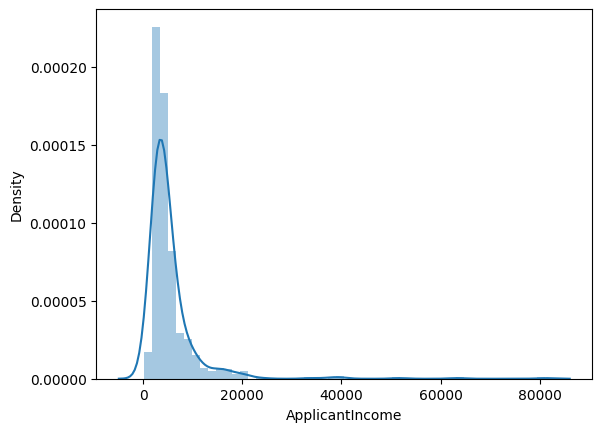

<ipython-input-18-0dfb96cc5a86>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n])


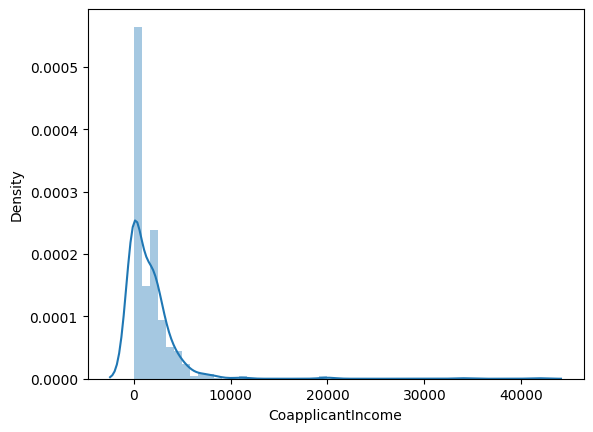

<ipython-input-18-0dfb96cc5a86>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n])


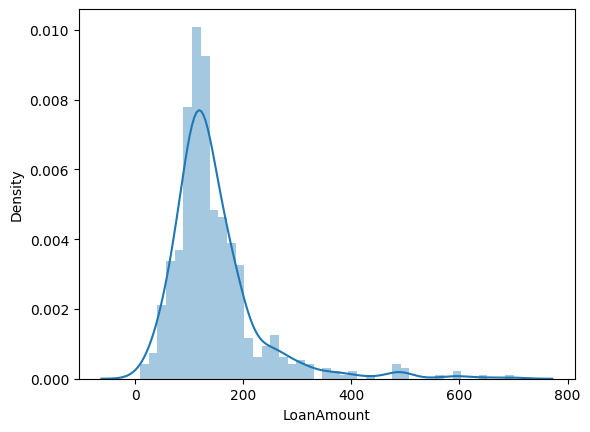

<ipython-input-18-0dfb96cc5a86>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n])


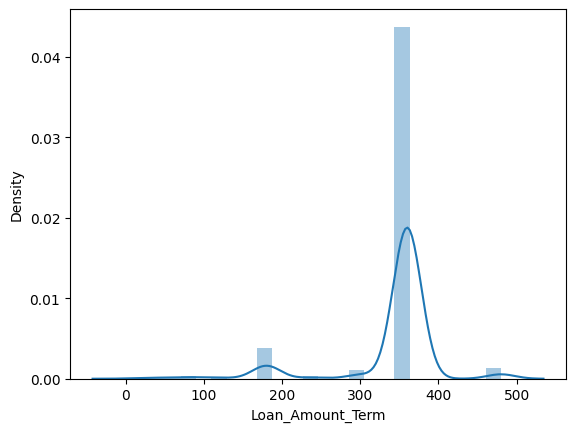

In [18]:
for n in num :
  sns.distplot(df[n])
  plt.show()

from above figures, we can know that none of them is normally distributed although LoanAmout is supposed to be nearly like normal.


so we should handle these skewed data by using transformation for equal spreads, linear relationships,etc

# **To handle right skewedness**

1.Log transformation

In [19]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
df.LoanAmount.skew() #skewness before transformation

2.677551679256059

In [21]:
np.log(df.LoanAmount).skew() #skewness after transformation

-0.19299810452881644

nearly zero

In [22]:
pd.DataFrame({'actual': df.LoanAmount, 'After': np.log(df.LoanAmount)})

,actual,After
0,NaN,NaN
1,128.0,4.852030
2,66.0,4.189655
3,120.0,4.787492
4,141.0,4.948760
...,...,...
609,71.0,4.262680
610,40.0,3.688879
611,253.0,5.533389
612,187.0,5.231109


<ipython-input-23-b4c4acdc2a7e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.LoanAmount, ax=ax[0])
<ipython-input-23-b4c4acdc2a7e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.LoanAmount), ax=ax[1])


<Axes: xlabel='LoanAmount', ylabel='Density'>

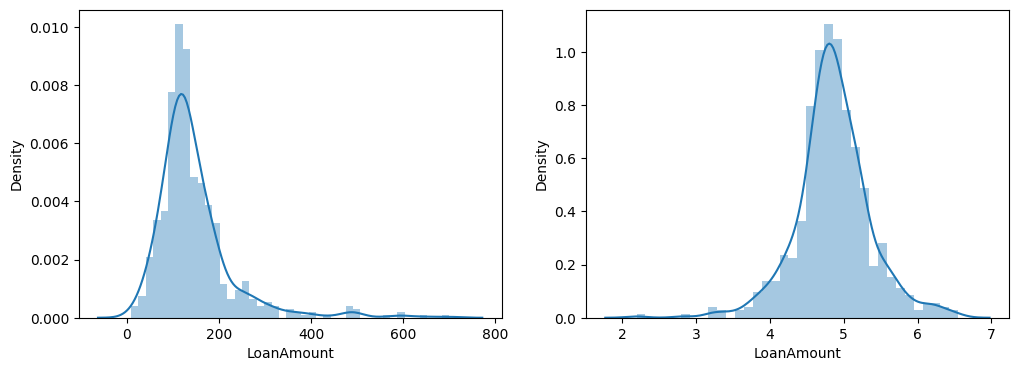

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(df.LoanAmount, ax=ax[0])
sns.distplot(np.log(df.LoanAmount), ax=ax[1])

So we can see the difference after using log transformation

now lets try next method for transformation

2. square root transformation

In [24]:
np.sqrt(df.LoanAmount).skew()

1.3053815639598734

since the value is more than 1 which means it is haevily skewed not compatible


still lets plot and check the result

<ipython-input-25-3321c6768bbe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.LoanAmount, ax=ax[0])
<ipython-input-25-3321c6768bbe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(df.LoanAmount), ax=ax[1])


<Axes: xlabel='LoanAmount', ylabel='Density'>

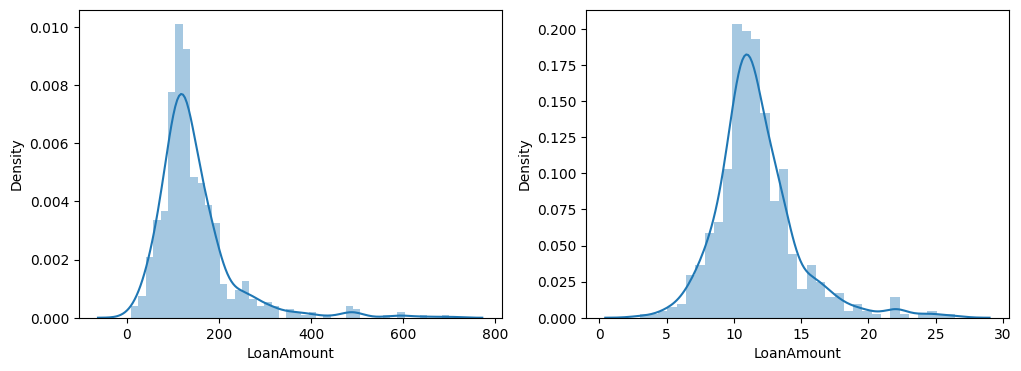

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(df.LoanAmount, ax=ax[0])
sns.distplot(np.sqrt(df.LoanAmount), ax=ax[1])

In [26]:
pd.DataFrame({'actual': df.LoanAmount, 'After': np.sqrt(df.LoanAmount)})

,actual,After
0,NaN,NaN
1,128.0,11.313708
2,66.0,8.124038
3,120.0,10.954451
4,141.0,11.874342
...,...,...
609,71.0,8.426150
610,40.0,6.324555
611,253.0,15.905974
612,187.0,13.674794


In [31]:
popn.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# **DAY 5**

**Kurtosis**

today let's learn about kurtosis. According to the note I took, it is clear that we need kurtosis value nearly equal to 3 for normal distribution as we are getting sample ready for linear machine learning model likr Logistic Regression
Decision Tree
k Nearest Neighbor (kNN)
Support Vector Machine (SVM

In [32]:
appInc = df.ApplicantIncome
loan = df.LoanAmount

In [33]:
loan.kurtosis()

10.40153349029416

In [34]:
appInc.kurtosis()

60.54067593369113

as we compare a kurtosis of income andloan, let's try to transform loan to fit our normal distribution

In [35]:
np.log(loan).kurtosis()

2.6113005270093015

In [58]:
np.log1p(loan).kurtosis()

2.4726763027968315

In [57]:
np.cbrt(loan).kurtosis()

2.6178312870568905

In [56]:
np.sqrt(loan).kurtosis()

3.742833081345744

from above calculation, we can see log and cube root values are near to 3 as we are doing hit and try method. Let's plot log and then cbrt

In [76]:
loan = loan.astype(float)

<ipython-input-78-67bfff42e2cf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.cbrt(loan), ax=ax[0], label="cuberrot")
<ipython-input-78-67bfff42e2cf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(loan), ax=ax[1])


<Axes: xlabel='LoanAmount', ylabel='Density'>

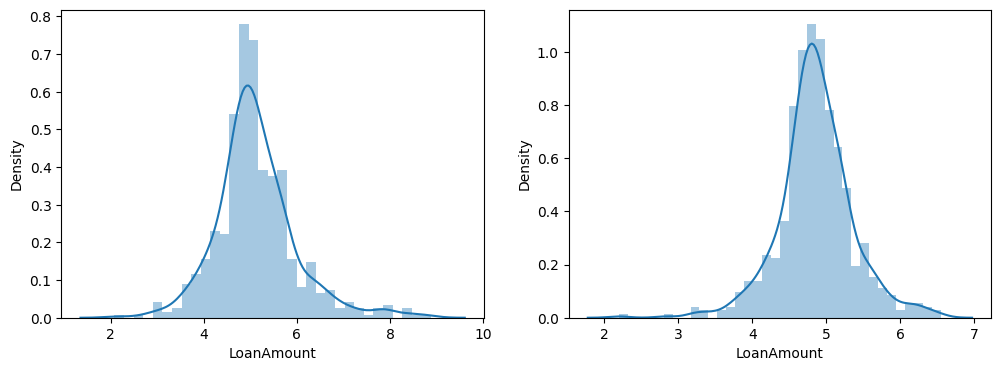

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(np.cbrt(loan), ax=ax[0], label="cuberrot")
sns.distplot(np.log(loan), ax=ax[1])


after watching the diagram, we can say left obe or cbrt is optiomal solution to meet the noraml distribution

**Next let's try it using lambda value systematically**
for this process we need boxcox transformation

In [93]:

from scipy import stats

_lambda = stats.boxcox_normmax(loan)
print(_lambda)


0.07780979983281637


lambda
* -2 = 1/sqrt
* -1 = power root
* -0.5 = 1/sq
* 0 = log
* 1 = as is
* 2 = sq





here systematically, we can say that lamda value is approx 0 (0.07).
from above table, it is suggested to use log so lets try it

In [94]:
np.log(loan).kurtosis()

2.6113005270093015

<ipython-input-102-493aa5fe2fe5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(loan), ax=ax[1])


<Axes: xlabel='LoanAmount', ylabel='Density'>

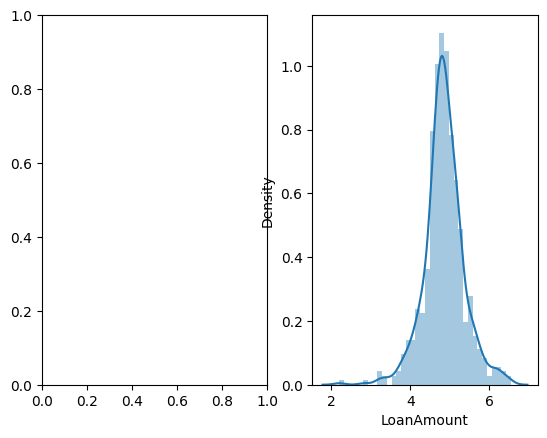

In [102]:
fig, ax = plt.subplots(1,2)
sns.distplot(np.log(loan), ax=ax[1])